In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
import os 
import imageio 
from IPython.display import Image
import pandas as pd
import csv

# V2

In [2]:
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 100
s_values = [10, 200, 400, 600, 800, 1000]
num_runs = 5
num_samples = len(s_values)
area_estimations_sum = np.zeros((i_max, num_samples, num_runs))
reference_areas = np.zeros((num_samples, num_runs))

for run in range(num_runs):
    print(f"Run {run + 1}/{num_runs}")

    np.random.seed()

    for idx, s in enumerate(s_values):
        reference_s = s
        reference_i_max = 100
        reference_area = 0.0

        for _ in range(reference_s):
            x = np.random.uniform(xmin, xmax)
            y = np.random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for _ in range(reference_i_max):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                reference_area += 1

        reference_area = (reference_area / reference_s) * (xmax - xmin) * (ymax - ymin)
        reference_areas[idx, run] = reference_area
        print(f"Reference Area for Run {run + 1}: {reference_area}, s: {s}")

        for j in range(1, i_max + 1):
            AM = 0.0
            for _ in range(s):
                x = np.random.uniform(xmin, xmax)
                y = np.random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c

                for _ in range(j):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    AM += 1

            AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
            area_estimations_sum[j - 1, idx, run] = AM

# Calculate the reference area averages for each 's' value
reference_areas_avg = np.mean(reference_areas, axis=1)
print(reference_areas_avg)

Run 1/5
Reference Area for Run 1: 0.9000000000000001, s: 10
Reference Area for Run 1: 1.62, s: 200
Reference Area for Run 1: 1.6425, s: 400
Reference Area for Run 1: 1.6350000000000002, s: 600
Reference Area for Run 1: 1.56375, s: 800
Reference Area for Run 1: 1.5749999999999997, s: 1000
Run 2/5
Reference Area for Run 2: 1.8000000000000003, s: 10
Reference Area for Run 2: 1.8900000000000001, s: 200
Reference Area for Run 2: 1.5749999999999997, s: 400
Reference Area for Run 2: 1.53, s: 600
Reference Area for Run 2: 1.4175, s: 800
Reference Area for Run 2: 1.566, s: 1000
Run 3/5
Reference Area for Run 3: 0.0, s: 10
Reference Area for Run 3: 1.5749999999999997, s: 200
Reference Area for Run 3: 1.4849999999999999, s: 400
Reference Area for Run 3: 1.545, s: 600
Reference Area for Run 3: 1.6087500000000001, s: 800
Reference Area for Run 3: 1.6109999999999998, s: 1000
Run 4/5
Reference Area for Run 4: 2.6999999999999997, s: 10
Reference Area for Run 4: 1.17, s: 200
Reference Area for Run 4: 1

In [3]:
# Save the averaged results and absolute errors to CSV files
csv_filename_avg_area = 'convergence_results_avg_area2.csv'
csv_filename_avg_error = 'convergence_results_avg_error2.csv'
csv_filename_subtraction = 'convergence_results_subtraction2.csv'

with open(csv_filename_avg_area, 'w', newline='') as csvfile_area, open(csv_filename_avg_error, 'w', newline='') as csvfile_error, open(csv_filename_subtraction, 'w', newline='') as csvfile_subtraction:
    fieldnames_area = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average']
    fieldnames_error = ['j', 's', 'average_absolute_error', 'errors']
    fieldnames_subtraction = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_subtraction', 'reference_value']

    writer_area = csv.DictWriter(csvfile_area, fieldnames=fieldnames_area)
    writer_error = csv.DictWriter(csvfile_error, fieldnames=fieldnames_error)
    writer_subtraction = csv.DictWriter(csvfile_subtraction, fieldnames=fieldnames_subtraction)

    # Write headers
    writer_area.writeheader()
    writer_error.writeheader()
    writer_subtraction.writeheader()

    for j in range(1, i_max + 1, 5):
        for idx, s in enumerate(s_values):
            row_data_area = {'j': j, 's': s, 'average': np.mean(area_estimations_sum[j - 1, idx])}
            row_data_area.update({f'run_{run + 1}': area_estimations_sum[j - 1, idx, run] for run in range(num_runs)})

            writer_area.writerow(row_data_area)

            row_data_error = {'j': j, 's': s, 'errors': []}
            row_data_subtraction = {'j': j, 's': s, 'reference_value': reference_areas[idx]}

            error_run_values = []
            subtraction_run_values = []
            for run in range(num_runs):
                error_value = area_estimations_sum[j - 1, idx, run] - reference_areas_avg[idx]
                error_run_values.append(error_value)
                subtraction_run_values.append(abs(error_value))

            row_data_error['average_absolute_error'] = np.mean(np.abs(error_run_values))
            row_data_error['errors'] = error_run_values

            row_data_subtraction['average_subtraction'] = np.mean(subtraction_run_values)
            row_data_subtraction.update({f'run_{run + 1}': error for run, error in enumerate(subtraction_run_values)})

            writer_error.writerow(row_data_error)
            writer_subtraction.writerow(row_data_subtraction)

In [4]:
# Save the averaged results and absolute errors to CSV files
csv_filename_avg_area = 'convergence_results_avg_area2.csv'
csv_filename_avg_error = 'convergence_results_avg_error2.csv'
csv_filename_subtraction = 'convergence_results_subtraction2.csv'

with open(csv_filename_avg_area, 'w', newline='') as csvfile_area, open(csv_filename_avg_error, 'w', newline='') as csvfile_error, open(csv_filename_subtraction, 'w', newline='') as csvfile_subtraction:
    fieldnames_area = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average']
    fieldnames_error = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_absolute_error']
    fieldnames_subtraction = ['j', 's'] + [f'run_{i + 1}' for i in range(num_runs)] + ['average_subtraction', 'reference_value']

    writer_area = csv.DictWriter(csvfile_area, fieldnames=fieldnames_area)
    writer_error = csv.DictWriter(csvfile_error, fieldnames=fieldnames_error)
    writer_subtraction = csv.DictWriter(csvfile_subtraction, fieldnames=fieldnames_subtraction)

    # Write headers
    writer_area.writeheader()
    writer_error.writeheader()
    writer_subtraction.writeheader()

    for j in range(1, i_max + 1, 5):
        for idx, s in enumerate(s_values):
            row_data_area = {'j': j, 's': s, 'average': np.mean(area_estimations_sum[j - 1, idx])}
            row_data_area.update({f'run_{run + 1}': area_estimations_sum[j - 1, idx, run] for run in range(num_runs)})

            writer_area.writerow(row_data_area)

            row_data_error = {'j': j, 's': s}
            error_run_values = []

            for run in range(num_runs):
                error_value = area_estimations_sum[j - 1, idx, run] - reference_areas_avg[idx]
                error_run_values.append(error_value)
                row_data_error[f'run_{run + 1}'] = error_value

            row_data_error['average_absolute_error'] = np.mean(np.abs(error_run_values))
            writer_error.writerow(row_data_error)

            row_data_subtraction = {'j': j, 's': s, 'reference_value': reference_areas_avg[idx]}

            subtraction_run_values = [abs(error) for error in error_run_values]
            row_data_subtraction['average_subtraction'] = np.mean(subtraction_run_values)
            row_data_subtraction.update({f'run_{run + 1}': error for run, error in enumerate(subtraction_run_values)})

            writer_subtraction.writerow(row_data_subtraction)

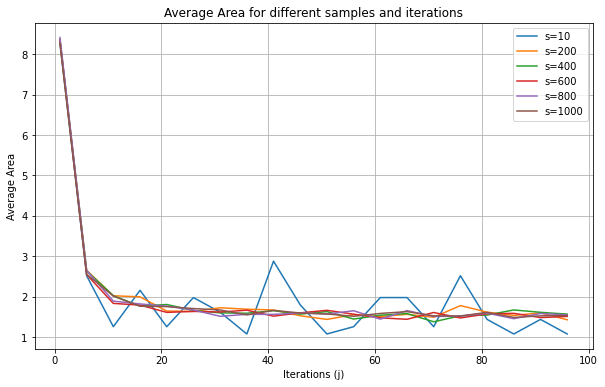

In [9]:
# Read the CSV file
data = pd.read_csv('convergence_results_avg_area2.csv')

# Extract the unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plotting for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average'], label=f's={s}')

# Plot settings
plt.xlabel('Iterations (j)')
plt.ylabel('Average Area')
plt.title('Average Area for different samples and iterations')
plt.legend()
plt.grid(True)
plt.show()

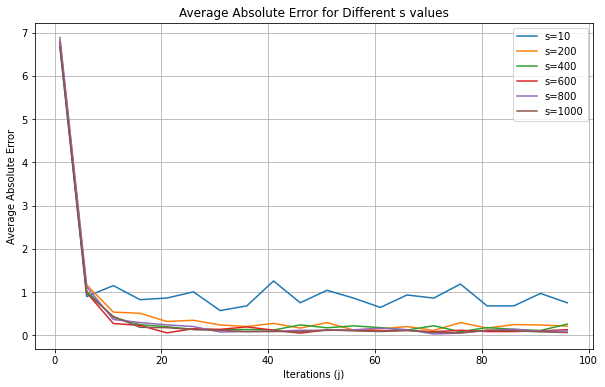

In [10]:
# Load the CSV file
file_path = 'convergence_results_avg_error2.csv'  
data = pd.read_csv(file_path)

# Get unique 's' values
s_values = data['s'].unique()

plt.figure(figsize=(10, 6))

# Plot for each 's' value
for s in s_values:
    s_data = data[data['s'] == s]
    plt.plot(s_data['j'], s_data['average_absolute_error'], label=f's={s}')

plt.xlabel('Iterations (j)')
plt.ylabel('Average Absolute Error')
plt.legend()
plt.title('Average Absolute Error for Different s values')
plt.grid(True)
plt.show()